<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Ganjil 2022/2023

Fakultas Ilmu Komputer, Universitas Indonesia

##**Lab *6*: *Regression***

###**Tenggat Waktu: 25 November 2022, 23.55 WIB**
</center>

####**Ketentuan:**

1. Dokumen *template* lab dengan format .ipynb dan dataset (jika dibutuhkan) telah disediakan di SCeLe
2. Jalankan kode pada dokumen .ipynb dan perhatikan dengan saksama apa yang potongan kode tersebut lakukan beserta dengan keluarannya. Jawablah **pertanyaan yang disisipkan** pada potongan program yang diberikan.
3. Dokumen Jupyter Notebook yang telah dilengkapi dengan jawaban dikumpulkan dengan format penamaan **Kelas_Lab6_NPM_Nama.ipynb**. Contoh: A_Lab6_2006123456_Budi.ipynb
4. Kumpulkan dokumen tersebut pada submisi yang telah disediakan di SCeLe sesuai dengan kelas masing-masing sebelum **25 November 2022, 23.55 WIB**. Keterlambatan pengumpulan akan dikenakan pinalti.
5. Lab ini dirancang sebagai **tugas mandiri**. Plagiarisme tidak diperkenankan dalam bentuk apapun. Adapun kolaborasi berupa diskusi (tanpa menyalin maupun mengambil jawaban orang lain) dan literasi masih diperbolehkan dengan mencantumkan kolaborator dan sumber.


## **Pernyataan Integritas**

Wajib diisi. Tanpa pernyataan integritas submisi akan dikenakan pinalti.

In [16]:
# Isi dengan data diri Anda
NAMA = "Sultan Fahrezy Syahdwinata Nugraha"
KELAS = "C"
NPM = "2006533811"

# Isi dengan NPM teman yang berdiskusi dengan Anda
KOLABORATOR = []

# Isi dengan sumber referensi yang Anda gunakan dalam mengerjakan
REFERENSI = []

In [17]:
PERNYATAAN_INTEGRITAS = "Saya, %s dari kelas %s dengan NPM %s, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.\n\
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.\n \
\n\
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.\n   \
(%s)" % (NAMA, KELAS, NPM, NAMA)

print(PERNYATAAN_INTEGRITAS)

Saya, Sultan Fahrezy Syahdwinata Nugraha dari kelas C dengan NPM 2006533811, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.
 
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.
   (Sultan Fahrezy Syahdwinata Nugraha)


## Intro to Linear Models for Regression and Classification

Pada lab kali ini, Anda akan mengimplementasikan model-model linear untuk melakukan prediksi regresi maupun klasifikasi. Beberapa model tersebut antara lain:
- Linear Regression
- Ridge Regression
- Lasso Regression
- Logistic Regression
- Softmax Regression

Sebelum ke latihan soal, mari pelajari sekilas mengenai beberapa model linear ini serta implementasinya dengan menggunakan Scikit-learn.

**NOTE:** Penjelasan di sini, sebagian besar, hanya untuk menunjukkan saja. Anda perlu belajar dari sumber lain (contoh: slide kuliah) untuk lebih memahami materi-materi di sini. Walau demikian, semoga penjelasan di sini dapat membantu Anda :)

### Linear Regression

Linear regression adalah teknik pencarian nilai-nilai parameter suatu persamaan linear yang cocok dengan data. Persamaan linear yang cocok adalah persamaan yang memiliki perbedaan hasil prediksi dan aktual minimal.

Contoh persamaan linear

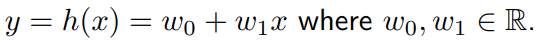

Persamaan di atas adalah fungsi yang memetakan **X** ke **Y** (anggap Y = h(x)), dengan:
- w0 adalah intersep
- w1 adalah koefisien
- x adalah nilai independen
- y adalah nilai dependen

Tentunya, persamaan ini bisa digeneralisasikan untuk banyak nilai x (fitur lebih dari 1) untuk menentukan nilai y. Berikut adalah persamaannya.

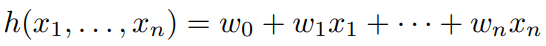

atau

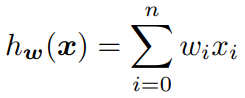

Nilai-nilai parameter seperti w0, w1, w2, wn, dst. inilah yang dicari untuk mendapatkan persamaan/fungsi yang cocok dengan data pada linear regression.

Pencarian didasarkan pada peminimalan error/residual dengan meminimal kan fungsi loss linear regression. J(w) di bawah ini adalah contoh fungsi loss linear regression.

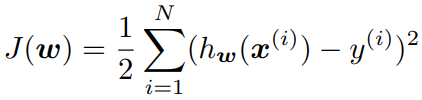

Proses peminimalan fungsi loss disebut dengan gradient descent yang bisa Anda pelajari lebih lanjut dari slide kuliah. :)

**Sumber gambar:** Slide kuliah "Linear Models for Regression and Classification" oleh Pak Adila A. Krisnadhi.

**Linear Regression dengan Scikit-learn**

Scikit-learn memiliki modul LinearRegression untuk membuat model linear regression. Di bawah ini adalah contoh implementasinya.

Pada percobaan kali ini, kita akan menggunakan data buatan yang terdiri dari 3 variabel dan 1 target. Hubungan antara variabel dan target dipenuhi oleh fungsi `y = 1+2x1+x2-x3`. Nilai-nilai 1, 2, 1, dan -1, secara berurutan dapat dianggap sebagai nilai w0, w1, w2, dan w3.

In [18]:
import numpy as np

# Membuat data buatan dengan beberapa noises yang disengaja

x1  = np.array([2, 3, 2, 4, 5, 2, 1, 5, 5, 1])
x2  = np.array([3, 4, 2, 3, 5, 6, 2, 1, 1, 4])
x3  = np.array([2, 1, 3, 2, 4, 3, 1, 3, 5, 6])

X_train = np.stack((x1, x2, x3), axis=1)
y_train   = np.array([6, 10, 4, 11, 12, 9, 4, 7, 7, 1])

print('X: ', X_train)
print('y: ', y_train)

X:  [[2 3 2]
 [3 4 1]
 [2 2 3]
 [4 3 2]
 [5 5 4]
 [2 6 3]
 [1 2 1]
 [5 1 3]
 [5 1 5]
 [1 4 6]]
y:  [ 6 10  4 11 12  9  4  7  7  1]


In [19]:
# Melatih model linear regression menggunakan Scikit-learn pada training set

from sklearn.linear_model import LinearRegression

linear = LinearRegression()
linear.fit(X_train, y_train)

LinearRegression()

Pada tahap ini, trained model 'linear' telah mengandung informasi (parameter-parameter) yang memenuhi suatu persamaan linear. Hal tersebut dapat kita lihat dengan cara di bawah ini.

In [20]:
# Melihat nilai koefisien dan intersep persamaan linear regression pada trained model

print("Koefisien persamaan linear: \n", linear.coef_)
print("Intersep persamaan linear: \n", linear.intercept_)

Koefisien persamaan linear: 
 [ 1.90430504  1.2595326  -1.03653137]
Intersep persamaan linear: 
 0.5921279212792125


Dapat dilihat bahwa nilai-nilai di atas hampir mirip dengan nilai-nilai intersep dan koefisien fungsi yang didefinisikan sebelumnya.

Selanjutnya, mari kita coba memprediksi nilai target dari data yang baru.

In [21]:
# Melakukan percobaan prediksi model linear regression menggunakan data testing buatan

X_test = np.array([[2, 3, 1], [1, 3, 4]])
y_test = np.array([7, 2])

y_predict = linear.predict(X_test)

print(y_predict)

[7.14280443 2.12890529]


Hasil prediksi (y_predict) memiliki nilai yang hampir mirip dengan nilai y yang sebenarnya (y_test). Hal ini menandakan model memiliki performa yang baik.

Performa model regresi dapat diukur dengan beberapa metrik evaluasi, contohnya adalah R-squared. Lihat kode di bawah ini.

In [22]:
from sklearn import metrics

# Nilai R-squared
print("R-squared:", metrics.r2_score(y_test, y_predict))

R-squared: 0.9970392257428109


Dari hasil di atas, dapat diketahui bahwa perbedaan antara prediksi dan aktual memiliki nilai yang kecil.

### Ridge and Lasso Regression

Linear regression adalah model yang memiliki ciri high-bias dan low-variance. Biasanya, model seperti ini cenderung tidak overfit. Walau demikian, linear regression masih dapat mengalami overfitting, apalagi pada data yang memiliki banyak fitur (high-dimension).

Untuk mengatasi hal tersebut, diperlukan regularisasi. Pada linear regression, regularisasi adalah teknik untuk meminimalkan fungsi loss dengan penambahan regularization term pada fungsi loss. Dua teknik regularisasi pada linear regression adalah Ridge dan Lasso. Berikut adalah modifikasi fungsi loss linear regression pada ridge dan lasso regression.

- Ridge regression

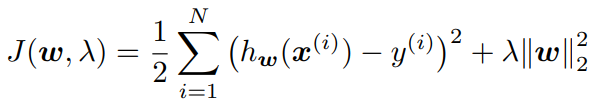

- Lasso Regression

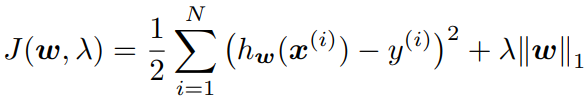

Term tambahan pada fungsi loss tersebut berperan seperti bobot pinalti untuk meminimalkan overfitting. Pada regularization term terdapat parameter λ yang pada sumber lain disebut sebagai α (alpha).

**Sumber gambar:** Slide kuliah "Linear Models for Regression and Classification" oleh Pak Adila A. Krisnadhi.

**Ridge dan Lasso Regression dengan Scikit-learn**

Berikut adalah contoh implementasi ridge dan lasso regression menggunakan modul scikit-learn pada dataset housing.

In [23]:
# Melatih model ridge regression menggunakan Scikit-learn pada training set

from sklearn.linear_model import Ridge

ridge = Ridge(alpha=5) # Mengatur hyperparameter alpha=5
ridge.fit(X_train, y_train)

Ridge(alpha=5)

Setelah pelatihan selesai, **ridge** sudah memiliki parameter-parameter yang dianggap cocok dalam persamaan linear regression dengan generalisasi ridge regression.

In [24]:
# Melatih model lasso regression menggunakan Scikit-learn pada training set

from sklearn.linear_model import Lasso

lasso = Lasso(alpha=5) # Mengatur hyperparameter alpha=5
lasso.fit(X_train, y_train)

Lasso(alpha=5)

Setelah pelatihan selesai, **ridge** sudah memiliki parameter-parameter yang dianggap cocok dalam persamaan linear regression dengan generalisasi ridge regression.

**NOTE**: Parameter alpha adalah parameter yang merepresentasikan “kekuatan” dari regularisasi yang dilakukan oleh model. Regularisasi adalah teknik modifikasi yang digunakan untuk mengurangi *generalization error*, dengan kata lain menghindari *overfitting*. Hal ini dilakukan dengan memberikan batasan/*constraint* atau penambahan penalti pada parameter/atribut yang kita gunakan. Untuk lebih jelas, silahkan baca dokumentasi model Ridge dan Lasso yang ada pada link berikut : [API Reference — scikit-learn 1.0.1 documentation ](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model)

Anda dipersilakan untuk mencoba sendiri memprediksi dan mengukur performa model ridge dan lasso regression. Performa mungkin tidak akan jauh berbeda dengan linear regression karena hanya mengunakan data yang sangat kecil.

### Logistic Regression

Logistic regression adalah model linear yang hanya memiliki dua nilai output: 0 atau 1. Oleh karena itu logistic regression lebih cocok dianggap sebagai classifier daripada regressor. Contoh visualisasinya adalah sebagai berikut.

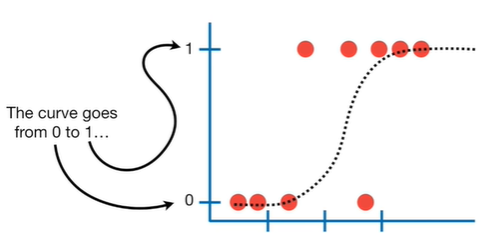

Sumber: https://youtu.be/yIYKR4sgzI8?t=222

Untuk mendapatkan kurva seperti pada gambar, berikut adalah persamaan logistic regression yang memenuhi.

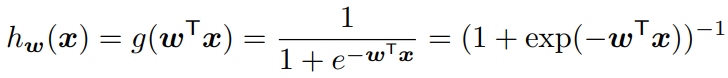

Berbeda dengan model linear, ridge, dan lasso regression yang meminimalkan fungsi loss. Pada logistic regression dilakukan proses memaksimalkan fungsi likelihood untuk menemukan parameter yang cocok dengan data.

Hal ini karena logistic regression merupakan metode klasifikasi. Sehingga, alih-alih meminimalkan perbedaan hasil prediksi, di sini memaksimalkan persamaan hasil prediksi dengan aktual.

Fungsi/persamaan likelihood dimaksimalkan melalui proses yang disebut dengan gradient ascent (tentunya bisa dipelajari sendiri dari slide :D). Berikut adalah persamaan likelihood tersebut.

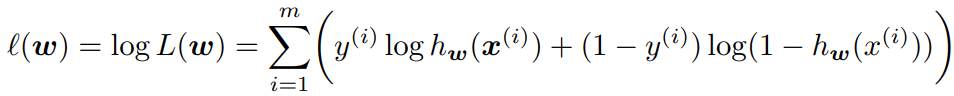

**Sumber gambar (persamaan) dan penjelasan lebih detail:** Slide kuliah "Linear Models for Regression and Classification" oleh Pak Adila A. Krisnadhi.

**Logistic regression** dengan Scikit-learn

Pada bagian ini kita melatih model logistic regression menggunakan modul dari scikit-learn. Data yang digunakan sama seperti pada bagian sebelumnya, hanya saja terdapat perubahan pada data target. Kali ini target hanya berisi nilai 0 atau 1. Nilai target (y_logistic_train) diolah dari y_train, dengan kondisi: bernilai 0 jika y_train >= 7 dan bernilai 1 jika sebaliknya.


In [25]:
x1  = np.array([2, 3, 2, 4, 5, 2, 1, 5, 5, 1])
x2  = np.array([3, 4, 2, 3, 5, 6, 2, 1, 1, 4])
x3  = np.array([2, 1, 3, 2, 4, 3, 1, 3, 5, 6])

X_train = np.stack((x1, x2, x3), axis=1)
y_logistic_train   = np.array([0, 1, 0, 1, 1, 1, 0, 1, 1, 0])

print('X: ', X_train)
print('y: ', y_train)

X:  [[2 3 2]
 [3 4 1]
 [2 2 3]
 [4 3 2]
 [5 5 4]
 [2 6 3]
 [1 2 1]
 [5 1 3]
 [5 1 5]
 [1 4 6]]
y:  [ 6 10  4 11 12  9  4  7  7  1]


In [26]:
# Melatih model logistic regression menggunakan Scikit-learn pada training set

from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()
logistic.fit(X_train, y_logistic_train)

LogisticRegression()

Selanjutnya, mari kita coba memprediksi nilai target dari data yang baru.

In [27]:
# Melakukan percobaan prediksi model logistic regression menggunakan data testing buatan

X_test = np.array([[2, 3, 1], [1, 3, 4]])
y_test = np.array([1, 0])

y_logistic_predict = logistic.predict(X_test)

print(y_logistic_predict)

[0 0]


Untuk mengevaluasi performa logistic regression, tentunya berbeda dengan linear, ridge, maupun lasso regression. Hasil prediksi model logistic regression dievaluasi selayaknya model klasifikasi. Contohnya dengan akurasi.

Melihat hasil prediksi di atas, kita dapat tahu bahwa model hanya berhasil memprediksi benar sebanyak satu saja. Oleh karena itu, nilai akurasi model logistic regression yang telah kita latih adalah sebesar 0.5.

In [28]:
# Menampilkan rata-rata akurasi
print("Nilai rata-rata akurasi:", logistic.score(X_test, y_test))

Nilai rata-rata akurasi: 0.5


### Softmax Regression

Softmax regression adalah model yang merupakan modifikasi dari logistic regression. Pada model ini, output dapat memiliki nilai lebih dari dua buah. Sehingga, softmax regression disebut sebagai multiclass classification.

Persamaan softmaxe regression:

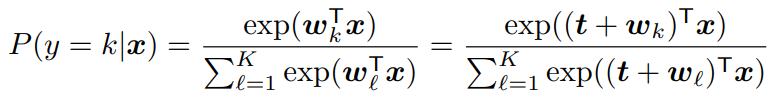

Persamaan likelihood softmaxe regression:

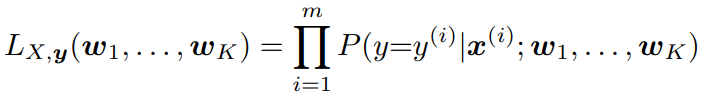

Proses memaksimalkan persamaan likelihood juga sama seperti pada logistic regression, yaitu dengan gradient ascent.

**Sumber gambar:** Slide kuliah "Linear Models for Regression and Classification" oleh Pak Adila A. Krisnadhi.

**Softmax regression dengan Scikit-learn**

Pada bagian ini kita melatih model softmax regression menggunakan modul dari scikit-learn. Softmax regression pada scikit-learn terdapat pada modul logistic regression dengan pengaturan hyperparameter 'multi_class' menjadi 'multinominal'.

Data yang digunakan sama seperti pada bagian sebelumnya, hanya saja terdapat perubahan pada data target. Kali ini target hanya berisi nilai 0, 1, 2. Nilai target (y_softmax_train) diolah dari y_train, dengan kondisi: bernilai 0 jika y_train < 6, bernilai 1 jika 6 <= y_train < 9, dan bernilai 2 jika y_train >=.


In [29]:
x1  = np.array([2, 3, 2, 4, 5, 2, 1, 5, 5, 1])
x2  = np.array([3, 4, 2, 3, 5, 6, 2, 1, 1, 4])
x3  = np.array([2, 1, 3, 2, 4, 3, 1, 3, 5, 6])

X_train = np.stack((x1, x2, x3), axis=1)
y_softmax_train   = np.array([1, 2, 0, 2, 2, 2, 0, 1, 1, 0])

print('X: ', X_train)
print('y: ', y_softmax_train)

X:  [[2 3 2]
 [3 4 1]
 [2 2 3]
 [4 3 2]
 [5 5 4]
 [2 6 3]
 [1 2 1]
 [5 1 3]
 [5 1 5]
 [1 4 6]]
y:  [1 2 0 2 2 2 0 1 1 0]


In [30]:
# Melatih model softmax regression menggunakan Scikit-learn pada training set

softmax = LogisticRegression(multi_class='multinomial')
softmax.fit(X_train, y_softmax_train)

LogisticRegression(multi_class='multinomial')

Selanjutnya, mari kita coba memprediksi nilai target dari data yang baru.

In [31]:
# Melakukan percobaan prediksi model softmax regression menggunakan data testing buatan

X_test = np.array([[2, 3, 1], [1, 3, 4]])
y_softmax_test = np.array([1, 0])

y_logistic_predict = softmax.predict(X_test)

print(y_logistic_predict)

[2 0]


Performa model softmax regression dievaluasi sama dengan logistic regression, selayaknya classifier. Contohnya adalah akurasi.

Melihat hasil prediksi di atas, kita dapat tahu bahwa model hanya berhasil memprediksi benar sebanyak satu saja. Oleh karena itu, nilai akurasi model logistic regression yang telah kita latih adalah sebesar 0.5.

In [32]:
# Menampilkan rata-rata akurasi
print("Nilai rata-rata akurasi:", softmax.score(X_test, y_test))

Nilai rata-rata akurasi: 0.5


## Latihan Soal

Pada bagian ini, Anda akan membuat prediksi regresi dan klasifikasi menggunakan beberapa model linear yang telah dipelajari di atas. Data yang digunakan lebih besar dibandingkan data buatan sebelumnya.

### Penjelasan Dataset

Dataset yang digunakan pada bagian ini adalah data perumahan di California, USA. Data didapatkan dari Kaggle dengan beberapa perubahan. Berikut penjelasan masing-masing kolom pada data.

- **Longitude:** Ukuran seberapa jauh ke barat sebuah rumah; nilai yang lebih tinggi lebih jauh ke barat

- **Latitude:** Ukuran seberapa jauh ke utara sebuah rumah; nilai yang lebih tinggi lebih jauh ke utara

- **TotalRooms:** Jumlah total kamar dalam satu blok

- **TotalBedrooms:** Jumlah total kamar tidur dalam satu blok

- **Population:** Jumlah total orang yang tinggal dalam satu blok

- **Households:** Jumlah total rumah tangga, sekelompok orang yang tinggal dalam satu unit rumah, untuk satu blok

- **HousingMedianAge:** Usia median sebuah rumah dalam satu blok; angka yang lebih rendah adalah bangunan yang lebih baru

- **MedianIncome:** Pendapatan median untuk rumah tangga dalam satu blok rumah (diukur dalam puluhan ribu Dolar AS)

- **TargetMedianHouseValue:** Nilai rumah rata-rata untuk rumah tangga dalam satu blok (diukur dalam Dolar AS)

- **TargetLogistic:** Pengelompokan nilai rumah rata-rata yang dibagi menjadi dua. Pembagi berdasarkan nilai mediannya (=17845). Bernilai 1 jika targetMedianHouseValue > 178450 dan 0 sebaliknya

- **TargetSoftmax:** Pengelompokan nilai rumah rata-rata yang dibagi menjadi tiga. Pembagi berdasarkan nilai persentil ke-33.33 (=142700) dan persentil ke-66.67 (=234900). Bernilai 2 jika targetMedianHouseValue >= 234900, 1 jika 142700 <= targetMedianHouseValue < 234900, dan 0 jika targetMedianHouseValue < 142700

**Sumber data dan penjelasan:** https://www.kaggle.com/datasets/camnugent/california-housing-prices

### Preprocessing

In [33]:
import pandas as pd

# Import dataset california housing
df = pd.read_csv('ca_housing.csv')

df.head()

,Longitude,Latitude,TotalRooms,TotalBedrooms,Population,Households,HousingMedianAge,MedianIncome,OceanProximity,TargetMedianHouseValue,TargetLogistic,TargetSoftmax
0,-122.69,38.34,2846,516.0,1526,492,23,3.7330,<1H OCEAN,163500,0,1
1,-117.28,32.83,2392,653.0,933,619,34,3.7306,NEAR OCEAN,500000,1,2
2,-122.04,37.31,2476,434.0,1217,416,29,6.2045,<1H OCEAN,393800,1,2
3,-117.07,32.91,2234,256.0,894,253,5,10.3354,<1H OCEAN,477600,1,2
4,-117.92,33.83,382,86.0,272,81,17,1.4250,<1H OCEAN,212500,1,1


In [34]:
# Menampilkan ringkasan data setiap kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Longitude               1000 non-null   float64
 1   Latitude                1000 non-null   float64
 2   TotalRooms              1000 non-null   int64  
 3   TotalBedrooms           988 non-null    float64
 4   Population              1000 non-null   int64  
 5   Households              1000 non-null   int64  
 6   HousingMedianAge        1000 non-null   int64  
 7   MedianIncome            1000 non-null   float64
 8   OceanProximity          1000 non-null   object 
 9   TargetMedianHouseValue  1000 non-null   int64  
 10  TargetLogistic          1000 non-null   int64  
 11  TargetSoftmax           1000 non-null   int64  
dtypes: float64(4), int64(7), object(1)
memory usage: 93.9+ KB


In [35]:
# Melihat deskripsi statistik dari kelompok fitur numerik
df.describe()

,Longitude,Latitude,TotalRooms,TotalBedrooms,Population,Households,HousingMedianAge,MedianIncome,TargetMedianHouseValue,TargetLogistic,TargetSoftmax
count,1000.000000,1000.000000,1000.000000,988.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,-119.571240,35.621040,2598.210000,527.345142,1403.143000,494.167000,29.350000,3.844988,209471.146000,0.50000,1.001000
std,2.022209,2.159259,2117.999988,395.919615,1064.360733,361.361508,12.841199,1.887100,117527.151777,0.50025,0.817109
min,-124.230000,32.560000,26.000000,9.000000,26.000000,10.000000,2.000000,0.706900,14999.000000,0.00000,0.000000
25%,-121.790000,33.930000,1437.500000,299.000000,792.750000,284.000000,19.000000,2.475475,122175.000000,0.00000,0.000000
50%,-118.470000,34.235000,2101.500000,418.000000,1151.500000,398.000000,30.000000,3.534100,178450.000000,0.50000,1.000000
75%,-118.007500,37.720000,3102.250000,623.250000,1688.000000,595.750000,38.000000,4.792300,268350.000000,1.00000,2.000000
max,-115.510000,41.860000,30401.000000,4957.000000,13251.000000,4339.000000,52.000000,15.000100,500001.000000,1.00000,2.000000


In [36]:
# Melihat deskripsi statistik dari kelompok fitur kategorikal
display(df.describe(include=object))

,OceanProximity
count,1000
unique,4
top,<1H OCEAN
freq,465


**Penanganan Missing Values**

In [37]:
# Melihat jumlah missing values

def cek_missing_values(df):
    col_na = df.isnull().sum().sort_values(ascending=False)
    percent = col_na / len(df)

    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data[missing_data['Total'] > 0]

cek_missing_values(df)

,Total,Percent
TotalBedrooms,12,0.012


Terdapat missing values pada kolom TotalBedrooms, sebesar 1.2%. Untuk mengatasi ini, nilai null diganti dengan nilai median.

In [40]:
# Menangani missing values dengan median
df.TotalBedrooms.fillna(df.TotalBedrooms.median(), inplace=True)

cek_missing_values(df)

,Total,Percent


**Penanganan Duplikasi Data**

In [41]:
# Melihat jumlah duplikasi data
print('Jumlah duplikasi pada data adalah', df.duplicated(keep=False).sum())

Jumlah duplikasi pada data adalah 0


**Penanganan Outliers**

In [42]:
# Melihat jumlah kemungkinan adanya outliers pada data menggunakan IQR

# Menghitung quartil 1 dan 3.
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

# Menghitung RUB dan RLB.
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

# Menampilkan banyaknya outlier pada atribut.
outliers = (df < lower_limit) | (df > upper_limit)
print ("Outlier pada tiap atribut:")
print(outliers.sum())

Outlier pada tiap atribut:
Households                62
HousingMedianAge           0
Latitude                   0
Longitude                  0
MedianIncome              28
OceanProximity             0
Population                63
TargetLogistic             0
TargetMedianHouseValue    54
TargetSoftmax              0
TotalBedrooms             69
TotalRooms                64
dtype: int64


<ipython-input-42-40e05c936c5c>:4: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
<ipython-input-42-40e05c936c5c>:5: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)
<ipython-input-42-40e05c936c5c>:13: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = (df < lower_limit) | (df > upper_limit)


Berdasarkan hasil di atas, terdapat beberapa outliers. Kali ini, outliers tersebut ditangani dengan menghapusnya.

In [43]:
# Menghapus outliers
df_cleaned = df[~((df <= lower_limit) | (df >= upper_limit)).any(axis=1)].reset_index(drop=True)

print(df_cleaned.shape)

(848, 12)


<ipython-input-43-5c228a35d89c>:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_cleaned = df[~((df <= lower_limit) | (df >= upper_limit)).any(axis=1)].reset_index(drop=True)


**NOTE:** Warning di atas terjadi karena terdapat kolom yang berjenis kategorikal, yaitu OceanProximity. Tidak perlu khawatir dengan warning tersebut.

**Encoding Data Kategorikal**

Karena terdapat kolom yang berjenis kategorikal, maka perlu dilakukan encoding agar menjadi data numerik. Metode encoding yang dilakukan adalah one-hot encoding.

In [44]:
# Melakukan one-hot encoding data kategorikal

df_cleaned = pd.get_dummies(df_cleaned, drop_first=True)
df_cleaned.head()

,Longitude,Latitude,TotalRooms,TotalBedrooms,Population,Households,HousingMedianAge,MedianIncome,TargetMedianHouseValue,TargetLogistic,TargetSoftmax,OceanProximity_INLAND,OceanProximity_NEAR BAY,OceanProximity_NEAR OCEAN
0,-122.69,38.34,2846,516.0,1526,492,23,3.7330,163500,0,1,0,0,0
1,-122.04,37.31,2476,434.0,1217,416,29,6.2045,393800,1,2,0,0,0
2,-117.92,33.83,382,86.0,272,81,17,1.4250,212500,1,1,0,0,0
3,-122.26,37.77,1670,350.0,793,299,52,2.9732,282100,1,2,0,1,0
4,-122.30,38.33,4741,956.0,2043,856,15,4.1862,183600,1,1,0,1,0


**Memisahkan Kolom-Kolom Target dan Fitur**

In [45]:
# Memisahkan kolom-kolom target untuk regression, logistic regression, dan softmax regression dari kolom-kolom fitur

X = df_cleaned.drop(columns=['TargetMedianHouseValue', 'TargetLogistic', 'TargetSoftmax']  , axis=1)


y = df_cleaned['TargetMedianHouseValue']
y_logistic = df_cleaned['TargetLogistic']
y_softmax = df_cleaned['TargetSoftmax']

Pada tahap ini, kita sudah memiliki:
- **X:** kolom-kolom fitur
- **y:** kolom target untuk linear, ridge, dan lasso regression
- **y_logistic:** kolom target logistic regression
- **y_softmax:** kolom target softmax regression

Dataset sudah siap digunakan. Saat ini, Anda diminta untuk mengerjakan latihan soal di bawah ini.

### Soal 1: Linear Regression

Ikuti langkah-langkah di bawah ini.

a. Bagi dataset menjadi training untuk melatih model dan testing untuk melakukan prediksi. Gunakan train_test_split dari Scikit-learn.

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [47]:
cek_missing_values(X_train)

,Total,Percent


b. Lakukan normalisasi pada kolom-kolom fitur selain kolom kategorikal. Latih terlebih dahulu scaler menggunakan training set, lalu scale untuk kedua training dan testing set.

In [48]:
cek_missing_values(X_train)

,Total,Percent


In [49]:
# Memisahkan atribut numerikal dengan katergorikal
df_numerical_test = X_test.drop(columns=['OceanProximity_INLAND', 'OceanProximity_NEAR BAY', 'OceanProximity_NEAR OCEAN'])
df_numerical_train = X_train.drop(columns=['OceanProximity_INLAND', 'OceanProximity_NEAR BAY', 'OceanProximity_NEAR OCEAN'])
df_numerical_train.reset_index(inplace=True)
df_numerical_train = df_numerical_train.drop(columns=['index'], axis=1)
df_numerical_test.reset_index(inplace=True)
df_numerical_test = df_numerical_test.drop(columns=['index'], axis=1)
display(df_numerical_train.head())
display(df_numerical_test.head())

,Longitude,Latitude,TotalRooms,TotalBedrooms,Population,Households,HousingMedianAge,MedianIncome
0,-118.11,33.85,2418,389.0,1138,387,36,4.8393
1,-117.61,33.43,1150,383.0,604,317,33,2.3545
2,-122.27,37.86,2052,435.0,924,414,49,2.5417
3,-121.96,37.06,1321,224.0,650,206,16,6.3258
4,-120.94,40.14,3127,664.0,1345,580,31,1.5774


,Longitude,Latitude,TotalRooms,TotalBedrooms,Population,Households,HousingMedianAge,MedianIncome
0,-117.33,33.23,1905,416.0,1258,388,15,3.3300
1,-120.00,35.91,259,53.0,131,38,16,3.1250
2,-121.82,37.25,3344,531.0,1768,541,24,5.8305
3,-115.57,32.78,2321,367.0,1173,360,29,4.0375
4,-118.43,34.24,1416,261.0,995,272,35,3.7143


In [50]:
cek_missing_values(X_train)

,Total,Percent


In [51]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

scaler.fit(X_train[df_numerical_train.columns])
X_train[df_numerical_train.columns] = scaler.transform(X_train[df_numerical_train.columns])

In [52]:
cek_missing_values(X_train)

,Total,Percent


In [53]:
X_test[df_numerical_test.columns] = scaler.transform(X_test[df_numerical_test.columns])

In [54]:
cek_missing_values(X_train)

,Total,Percent


c. Lakukan prediksi TargetMedianHouseValue menggunakan Linear Regression

In [55]:
linear = LinearRegression()
linear.fit(X_train, y_train)

LinearRegression()

In [56]:
linear.coef_

array([-97700.49706039, -94492.46210927, -13747.16673834,  23473.65449048,
       -48185.59463875,  36113.33728787,  17867.02689958,  93027.97829266,
       -28434.34644657, -22548.98196397,  -2139.84583541])

In [57]:
linear.intercept_

208171.93711017215

In [58]:
predict1 = linear.predict(X_test)

d. Tampilkan visualisasi perbandingan hasil prediksi dengan aktual

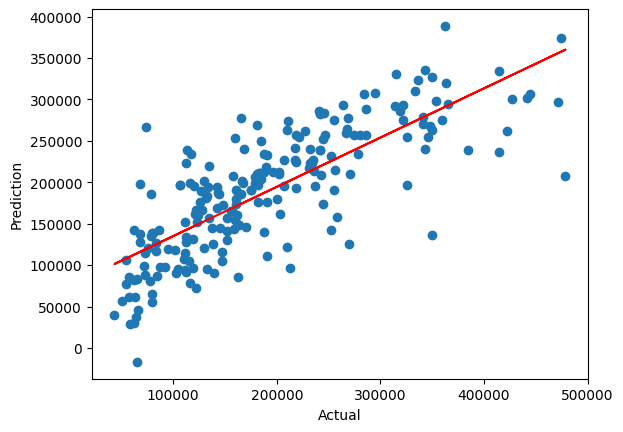

In [59]:
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import polyfit

reg = np.polyfit(y_test, predict1, deg=1)
trend = np.polyval(reg, y_test)
plt.scatter(y_test, predict1)
plt.plot(y_test, trend, 'r')
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.show()

e. Persamaan linear apa yang terbentuk pada model linear regression yang dilatih?

h(x) = 208171.93711017218 + -97700.49706039(Longitude) + -94492.46210927(Latitude) + -13747.16673834(TotalRooms)  + 23473.65449048(TotalBedrooms) + -48185.59463875(Population) + 36113.33728787(Households) + 17867.02689958(HousingMedianAge) + 93027.97829266(MedianIncome) + -28434.34644657(OceanProximity_INLAND) + -22548.98196397(OceanProximity_NEAR BAY) + -2139.84583541(OceanProximity_NEAR OCEAN)

f. Tampilkan metrik evaluasi regresi yang mencakup MSE, MAE, RMSE, dan R2 Squared!

In [60]:
# https://medium.com/analytics-vidhya/evaluation-metrics-for-regression-models-c91c65d73af
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
def metrics(prediction):
    MAE = mean_absolute_error(y_test, prediction)
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    R_squared = r2_score(y_test, prediction)

    print('MAE: ' + str(MAE))
    print('MSE: ' + str(MSE))
    print('RMSE: ' + str(RMSE))
    print('R_squared: ' + str(R_squared))

In [61]:
metrics(predict1)

MAE: 44942.66782985461
MSE: 3846697292.185464
RMSE: 62021.74854182574
R_squared: 0.6090912825793715


### Soal 2: Ridge Regression

Ikuti langkah-langkah di bawah ini. Gunakan training dan testing set yang sama dengan Linear Regression.

a. Tentukan minimal 5 buah nilai parameter alpha untuk digunakan dalam membangun model Ridge Regression

In [62]:
ridge = Ridge(alpha=5)
ridge2 = Ridge(alpha=6)
ridge3 = Ridge(alpha=7)
ridge4 = Ridge(alpha=8)
ridge5 = Ridge(alpha=9)

b. Bangun (fit) model sebanyak nilai parameter alpha yang dipilih

In [63]:
ridge.fit(X_train, y_train)
ridge2.fit(X_train, y_train)
ridge3.fit(X_train, y_train)
ridge4.fit(X_train, y_train)
ridge5.fit(X_train, y_train)

Ridge(alpha=9)

c. Tampilkan nilai R-squared untuk masing-masing model pada training dan testing set

In [64]:
ridge_predict_train = ridge.predict(X_train)
ridge_predict_test = ridge.predict(X_test)
print('R2_score (train): {}'.format(r2_score(y_train, ridge_predict_train)))
print('R2_score (test): {}'.format(r2_score(y_test, ridge_predict_test)))

R2_score (train): 0.6386260108068967
R2_score (test): 0.6049332708960321


In [65]:
ridge_predict_train2 = ridge2.predict(X_train)
ridge_predict_test2 = ridge2.predict(X_test)
print('R2_score (train): {}'.format(r2_score(y_train, ridge_predict_train2)))
print('R2_score (test): {}'.format(r2_score(y_test, ridge_predict_test2)))

R2_score (train): 0.6376657219601616
R2_score (test): 0.6040507927561367


In [66]:
ridge_predict_train3 = ridge3.predict(X_train)
ridge_predict_test3 = ridge3.predict(X_test)
print('R2_score (train): {}'.format(r2_score(y_train, ridge_predict_train3)))
print('R2_score (test): {}'.format(r2_score(y_test, ridge_predict_test3)))

R2_score (train): 0.6367300668219886
R2_score (test): 0.603187207991005


In [67]:
ridge_predict_train4 = ridge4.predict(X_train)
ridge_predict_test4 = ridge4.predict(X_test)
print('R2_score (train): {}'.format(r2_score(y_train, ridge_predict_train4)))
print('R2_score (test): {}'.format(r2_score(y_test, ridge_predict_test4)))

R2_score (train): 0.635818958029879
R2_score (test): 0.6023404756663155


In [68]:
ridge_predict_train5 = ridge5.predict(X_train)
ridge_predict_test5 = ridge5.predict(X_test)
print('R2_score (train): {}'.format(r2_score(y_train, ridge_predict_train5)))
print('R2_score (test): {}'.format(r2_score(y_test, ridge_predict_test5)))

R2_score (train): 0.6349306088984348
R2_score (test): 0.6015081063685294


d. Berikan analisis hubungan perubahan nilai parameter alpha dengan kualitas hasil regresi berdasarkan nilai R-squared

Berdasarkan percobaan yang telah saya lakukan dengan mengubah-ubah nilai parameter alpha dari model Ridge Regression yang saya miliki. Semakin besar nilai alpha yang diberikan maka nilai evaluasi berdasarkan R-squared yang dihasilkan akan semakin kecil walaupun perbedaannya kerap tidak signifikan. Hal ini menandakan semakin tinggi nilai alpha yang diberikan pada model Ridge Regression maka model yang dihasilkan akan semakin tidak fleksibel yang diakibatkan semakin kecilnya pengaruh sebuah fitur/koefisien. Itulah mengapa semakin besar alphanya maka R-squared nya semakin kecil, karena R-squared merepresentasikan sebarapa besar variable independent mempengaruhi variable dependent.

### Soal 3: Lasso Regression

Ikuti langkah-langkah di bawah ini. Gunakan training dan testing set yang sama dengan Linear Regression.

a. Tentukan minimal 5 buah nilai parameter alpha untuk digunakan dalam membangun model Lasso Regression

In [69]:
lasso = Lasso(alpha=6)
lasso2 = Lasso(alpha=7)
lasso3 = Lasso(alpha=8)
lasso4 = Lasso(alpha=9)
lasso5 = Lasso(alpha=10)

b. Bangun (fit) model sebanyak nilai parameter alpha yang dipilih

In [70]:
lasso.fit(X_train, y_train)
lasso2.fit(X_train, y_train)
lasso3.fit(X_train, y_train)
lasso4.fit(X_train, y_train)
lasso5.fit(X_train, y_train)

Lasso(alpha=10)

c. Tampilkan nilai R-squared untuk masing-masing model pada training dan testing set

In [71]:
lasso_predict_train = lasso.predict(X_train)
lasso_predict_test = lasso.predict(X_test)
print('R2_score (train): {}'.format(r2_score(y_train, lasso_predict_train)))
print('R2_score (test): {}'.format(r2_score(y_test, lasso_predict_test)))

R2_score (train): 0.6427589800482081
R2_score (test): 0.6090233311722308


In [72]:
lasso_predict_train2 = lasso2.predict(X_train)
lasso_predict_tes2 = lasso2.predict(X_test)
print('R2_score (train): {}'.format(r2_score(y_train, lasso_predict_train2)))
print('R2_score (test): {}'.format(r2_score(y_test, lasso_predict_tes2)))

R2_score (train): 0.6427585384430563
R2_score (test): 0.6090118298675384


In [73]:
lasso_predict_train3 = lasso3.predict(X_train)
lasso_predict_test3 = lasso3.predict(X_test)
print('R2_score (train): {}'.format(r2_score(y_train, lasso_predict_train3)))
print('R2_score (test): {}'.format(r2_score(y_test, lasso_predict_test3)))

R2_score (train): 0.6427580268046356
R2_score (test): 0.6090002841205052


In [74]:
lasso_predict_train4 = lasso4.predict(X_train)
lasso_predict_test4 = lasso4.predict(X_test)
print('R2_score (train): {}'.format(r2_score(y_train, lasso_predict_train4)))
print('R2_score (test): {}'.format(r2_score(y_test, lasso_predict_test4)))

R2_score (train): 0.6427574483089062
R2_score (test): 0.6089886859408358


In [75]:
lasso_predict_train5 = lasso5.predict(X_train)
lasso_predict_test5 = lasso5.predict(X_test)
print('R2_score (train): {}'.format(r2_score(y_train, lasso_predict_train5)))
print('R2_score (test): {}'.format(r2_score(y_test, lasso_predict_test5)))

R2_score (train): 0.6427568012403275
R2_score (test): 0.608977039019608


d. Berikan analisis hubungan perubahan nilai parameter alpha dengan kualitas hasil regresi berdasarkan nilai R-squared

Sama seperti model sebelumnya, model Lasso Regression ini juga akan memberikan hasil yang sama apabila kita mengubah parameter alphanya. Semakin kita besarkan nilai parameter alphanya, maka semakin kecil nilai evaluasi berdasarkan R-squared yang kita dapatkan. Hal ini menandakan bahwa model Lasso Regression juga akan semakin kehilangan fleksibelitasnya dengan semakin membersarnya nilai alpha yang diberikan.

### Soal 4: Logistic Regression

Ikuti langkah-langkah di bawah ini.

a. Bagi dataset menjadi training untuk melatih model dan testing untuk melakukan prediksi. Gunakan train_test_split dari Scikit-learn.

In [76]:
X_train_logistic, X_test_logistic, y_train_logistic, y_test_logistic = train_test_split(X, y_logistic, test_size=0.25, random_state=42)

b. Lakukan normalisasi pada kolom-kolom fitur selain kolom kategorikal. Latih terlebih dahulu scaler menggunakan training set, lalu scale untuk kedua training dan testing set

In [77]:
scaler2 = RobustScaler()

scaler2.fit(X_train_logistic[df_numerical_train.columns])
X_train_logistic[df_numerical_train.columns] = scaler2.transform(X_train_logistic[df_numerical_train.columns])

In [78]:
X_test_logistic[df_numerical_test.columns] = scaler2.transform(X_test_logistic[df_numerical_test.columns])

c. Lakukan prediksi TargetLogistic menggunakan Logistic Regression

In [79]:
logistic = LogisticRegression()
logistic.fit(X_train_logistic, y_train_logistic)
logistic_predict = logistic.predict(X_test_logistic)

d. Tampilkan confussion matrix hasil prediksi

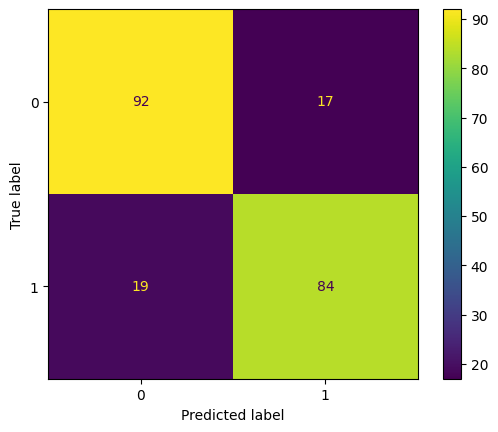

In [82]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay.from_estimator(
        logistic,
        X_test_logistic,
        y_test_logistic,
    )
# plt.title('Confusion Matrix', fontsize=14)
# plt.show()

e. Tampilkan hasil evaluasi model klasifikasi

In [83]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Accuracy: {}".format(accuracy_score(y_test_logistic, logistic_predict)))
print("Precision: {}".format(precision_score(y_test_logistic, logistic_predict)))
print("Recall: {}".format(recall_score(y_test_logistic, logistic_predict)))
print("F1_score: {}".format(f1_score(y_test_logistic, logistic_predict)))

Accuracy: 0.8301886792452831
Precision: 0.8316831683168316
Recall: 0.8155339805825242
F1_score: 0.8235294117647058


In [84]:
# Menampilkan rata-rata akurasi
print("Nilai rata-rata akurasi:", logistic.score(X_test_logistic, y_test_logistic))

Nilai rata-rata akurasi: 0.8301886792452831


f. Berikan analisis terhadap hasil evaluasi

<ipython-input-85-d595c9aef2b5>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[pd.DataFrame(y_logistic).columns[i]], shade=True)


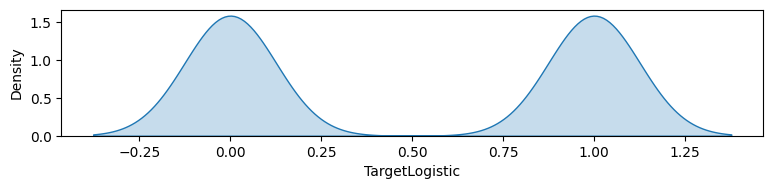

In [85]:
import seaborn as sns

plt.figure(figsize=(15, 20))
for i in range(len(pd.DataFrame(y_logistic).columns)):
    plt.subplot(11, 2, i+1)
    sns.kdeplot(df[pd.DataFrame(y_logistic).columns[i]], shade=True)
    plt.tight_layout()

Dapat dilihat bahwa dataset yang kita miliki merupakan data yang sangat balanced, sehingga nilai Accuracy yang besar yakni 0.83 menandakan bahwa model yang kita buat memang sudah tepat dalam mengklasifikasikan hasilnya dengan bias yang kecil. Selain itu, nilai F1 Score yang sudah bagus juga yakni 0.82 menunjukkan bahwa model yang kita miliki tingkan False Negative dan False Positive yang rendah. Bagaimanapun itu, model yang kita buat sudah memiliki nilai yang cukup baik untuk apapun tujuan klasifikasi yang ingin dilakukan.

### Soal 5: Softmax Regression

Ikuti langkah-langkah di bawah ini.

a. Bagi dataset menjadi training untuk melatih model dan testing untuk melakukan prediksi. Gunakan train_test_split dari Scikit-learn.

In [86]:
X_train_softmax, X_test_softmax, y_train_softmax, y_test_softmax = train_test_split(X, y_softmax, test_size=0.25, random_state=42)

b. Lakukan normalisasi pada kolom-kolom fitur selain kolom kategorikal. Latih terlebih dahulu scaler menggunakan training set, lalu scale untuk kedua training dan testing set.

In [88]:
scaler3 = RobustScaler()

scaler3.fit(X_train_softmax[df_numerical_train.columns])
X_train_softmax[df_numerical_train.columns] = scaler3.transform(X_train_softmax[df_numerical_train.columns])

In [89]:
X_test_softmax[df_numerical_test.columns] = scaler3.transform(X_test_softmax[df_numerical_test.columns])

c. Lakukan prediksi TargetSoftmax menggunakan Softmax Regression

In [90]:
softmax = LogisticRegression(multi_class='multinomial', max_iter=10000)
softmax.fit(X_train_softmax, y_train_softmax)
softmax_predict = softmax.predict(X_test_softmax)

d. Tampilkan confussion matrix hasil prediksi

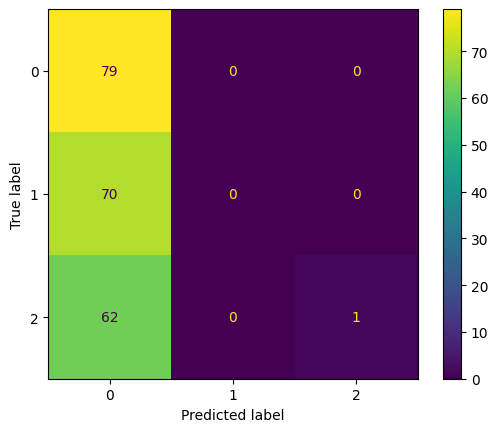

In [92]:
disp = ConfusionMatrixDisplay.from_estimator(
        softmax,
        X_test_softmax,
        y_test_softmax,
    )

e. Tampilkan hasil evaluasi model klasifikasi

In [93]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Accuracy: {}".format(accuracy_score(y_test_softmax, softmax_predict)))
print("Precision: {}".format(precision_score(y_test_softmax, softmax_predict, average='macro')))
print("Recall: {}".format(recall_score(y_test_softmax, softmax_predict, average='macro')))
print("F1_score: {}".format(f1_score(y_test_softmax, softmax_predict, average='macro')))

Accuracy: 0.37735849056603776
Precision: 0.45813586097946285
Recall: 0.3386243386243386
F1_score: 0.19202586206896552


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


f. Berikan analisis terhadap hasil evaluasi

<ipython-input-94-b6ff7dbd8e4b>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[pd.DataFrame(y_softmax).columns[i]], shade=True)


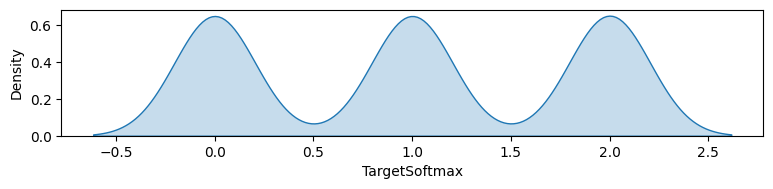

In [94]:
plt.figure(figsize=(15, 20))
for i in range(len(pd.DataFrame(y_softmax).columns)):
    plt.subplot(11, 2, i+1)
    sns.kdeplot(df[pd.DataFrame(y_softmax).columns[i]], shade=True)
    plt.tight_layout()

Dapat dilihat bahwa dataset yang kita miliki merupakan data yang sangat balanced, sehingga nilai Accuracy yang masih lumayan rendah yakni 0.70 menandakan bahwa model tersebut memang masih belum bisa melakukan klasifikasi dengan baik dan masih banyak klasifikasi yang salah. Selain itu, karena data ini memang balance maka nilai F1 Score yang diperoleh juga akan mendekati nilai Accuracy serta penilaian yang paling baik adalah menggunakan parameter Macro karena datanya sudah balance.

### Soal 6: Pertanyaan Teoritis

Jawablah pertanyaan-pertanyaan di bawah ini.

a. Pada bagian preprocessing data dilakukan one-hot encoding untuk kolom kategorikal. Perhatikan bahwa terdapat pengaturan parameter **drop_first=True**. Apa yang dilakukan oleh pengaturan tersebut? Apa manfaatnya bagi pemodelan linear regression?

Jawaban: <br>
Parameter drop_first=True memiliki penjelasan "Whether to get k-1 dummies out of k categorical levels by removing the first level." dari dokumentasi resmi pandas. Penjelasan tersebut memliki arti bahwa parameter drop_first=True akan mengakibatkan satu kolom kategori yang dihasilkan setelah encoding menjadi dihilangkan. Hal ini berguna untuk mengurangi redundansi pada data karena informasi yang dibawa oleh satu kolom yang terbuang tersebut telah dibawa oleh kolom-kolom yang lainnya. Misalnya, setelah one hot encoding kolom Ocean Proximity terbagi menjadi 4 yakni `<1Hour`, `OceanProximity_INLAND`, `OceanProximity_NEAR BAY`, `OceanProximity_NEAR OCEAN`. Padahal klasifikasi `<1Hour` sudah direpresentasikan dari nilai-nilai 0 dari ketiga kolom lainnya, oleh karena itulah dilakukan drop_first=True

b. Bandingkan perbedaan hasil linear, ridge, dan lasso regression yang telah Anda lakukan. Apa hal menarik yang Anda dapatkan?

Jawaban: <br>
Setelah membuat dan menganalisis setiap model tersebut, dapat dilihat bahwa nilai yang diberikan dari setiap model tidak jauh berbeda. Hal ini dikarenakan model Ridge dan Lasso merupakan bentuk lain dari Linear Regression yang bertujuan untuk mengurangi overfit dengan memberikan regularisasi dengan cara penalty untuk setiap fiturnya. Artinya, dataset yang kita gunakan memang tidak menimbulkan overfitting.

c. Jelaskan mengapa lasso regression dapat dijadikan model untuk feature selection, sedangkan ridge regression tidak?

Karena ada suatu attribut yang dapat dihasilkan Lasso Regression bernama sparse_coef_. sparse_coef sendiri merupakan sebuah sparse representation dari coef_ yang didapatkan dari setiap fitur yang kita miliki. Sparse representation ini sendiri dapat dimanfaat untuk feature selection, dimana sparse representation yang dimiliki dapat menjadi menunjukkan fitur minimal mana saja yang diperlukan untuk merepresentasikan semua informasi dari sebuah dataset. Fakta menarik yang saya temukan adalah sparse representation merupakan bentuk sederhana dan pendahulu dari Principal Component Analysis (PCA).